In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
print("*"*20)
inspector = inspect(engine)
for x in inspector.get_table_names():
    print(f'Table: {x}\n{"*"*20}')
    for y in inspector.get_columns(x):
        print(y['name'], y['type'])
    print("*"*20)


********************
Table: measurement
********************
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
********************
Table: station
********************
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
********************


# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date_query 

('2017-08-23',)

<AxesSubplot:xlabel='date'>

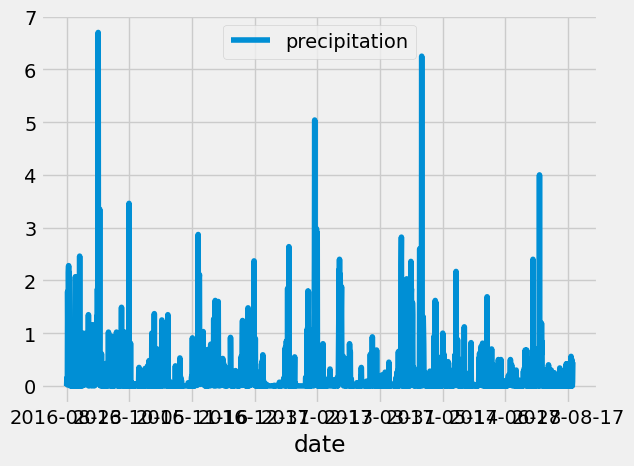

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
new_var = date_query 
# Calculate the date one year from the last date in data set.
last_year_query = session.query(Measurement.date).filter(Measurement.date >= '2016-08-23').all()

# Perform a query to retrieve the data and precipitation scores
date_and_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_and_precip, columns=['date','precipitation']).dropna().set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='line')


In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
# Query database
# Look at station name
# count unique names

session.query(Station.name).count()

9

In [39]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# Query datase
# look at each station name and times it exists in db
# sort it to find the moist active
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

('USC00519281', 2772)

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# query datase
# look at station id
# func.min/max/avg
# locate witch station
session.query(Station.id, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).where(Station.station == "USC00519281").first()

C:\Users\linnv\AppData\Local\Temp\ipykernel_15632\882183408.py:6: SAWarning: SELECT statement has a cartesian product between FROM element(s) "station" and FROM element "measurement".  Apply join condition(s) between each element to resolve.
  session.query(Station.id, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).where(Station.station == "USC00519281").first()


(7, 53.0, 87.0, 73.09795396419437)

<AxesSubplot:ylabel='Frequency'>

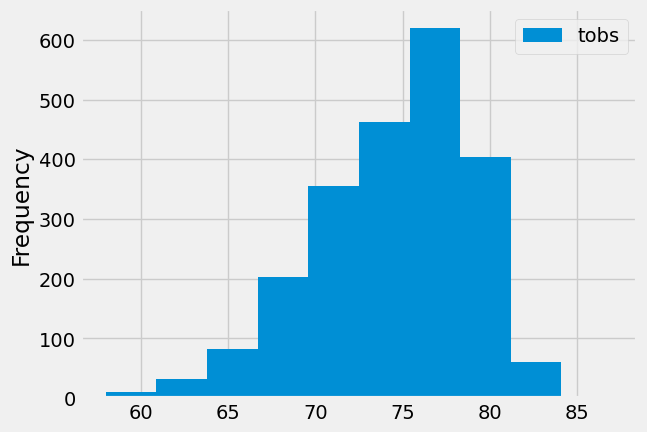

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_query = session.query(Station.id, Measurement.tobs).filter(Measurement.date >= '2016-08-23').where(Station.id == 7).all()
temperature_query

df = pd.DataFrame(temperature_query, columns=['id','tobs']).dropna().set_index('id')

df.plot(kind='hist')

# Close session

In [ ]:
# Close Session
session.close()